# direct.h5 analysis
* `w_ipa -ao` after defining the analysis schemes in west.cfg
* The script here reads the direct.h5 file and extracts relevant information such as fluxes, rates, MFPTs, etc

In [56]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [299]:
f1 = h5py.File('ANALYSIS/trans_cis_100it/trans_cis_100it.h5', 'r') # loads only the SS portion, right for rates, since cumulative
f2 = h5py.File('ANALYSIS/trans_cis/trans_cis.h5', 'r') # loads the full trajectory, wrong for rates, since cumulative

In [116]:
f1.keys()

<KeysViewHDF5 ['arrivals', 'avg_color_probs', 'avg_conditional_fluxes', 'avg_rates', 'avg_state_probs', 'avg_total_fluxes', 'color_prob_evolution', 'conditional_arrivals', 'conditional_flux_evolution', 'conditional_fluxes', 'duration_count', 'durations', 'rate_evolution', 'state_labels', 'state_pop_evolution', 'target_flux_evolution', 'total_fluxes']>

## State populations

### Trans population

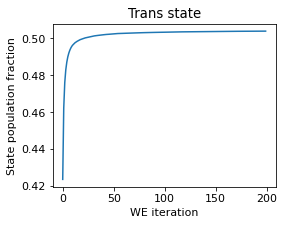

In [297]:
statepop = [np.array(f2['state_pop_evolution'])[i][1][2] for i in range(200)]
plt.figure(figsize=(4,3))
plt.rcParams['font.size'] = '11'
plt.plot(statepop)
plt.xlabel('WE iteration')
plt.ylabel('State population fraction')
plt.title('Trans state')
#plt.ylim([0.45, 0.55])
plt.savefig('statepop_trans.png',dpi=300, bbox_inches='tight')

### Cis population

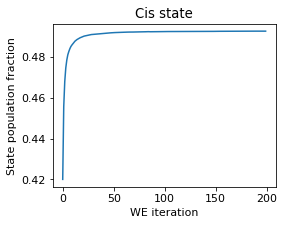

In [300]:
statepop = [np.array(f2['state_pop_evolution'])[i][0][2] for i in range(200)]
plt.figure(figsize=(4,3))
plt.rcParams['font.size'] = '11'
plt.plot(statepop)
plt.xlabel('WE iteration')
plt.ylabel('State population fraction')
plt.title('Cis state')
#plt.ylim([0.45, 0.55])
plt.savefig('statepop_cis.png',dpi=300, bbox_inches='tight')

## Rates from rate evolution
* Note that conditional flux evolution considers the amount of  probability in the states while rate evolution does not. $F_{A\to B} = k_{A \to B} *P_{A}$
* see this: https://github.com/westpa/westpa/wiki/Na--Cl--Association-with-Gromacs-2018.2#Computing_the_association_rate
* also see this: https://github.com/westpa/westpa/wiki/Calculating-Rate-Constants
* also also see wespta2 tutorials for python analysis: https://github.com/westpa/westpa2_tutorials/blob/main/tutorial-3.2/analysis.ipynb
* Also note the slightly confusing "to" and "from" notations in hdf5viwer:
  * However, it is clear here [:,0,1] means for all iterations going from state 0 to state 1
  * If doubts in hdf5viwever, go to target flux evolution and see the headers for the target states

### Trans to cis transition rate (SS, 100th iteration)

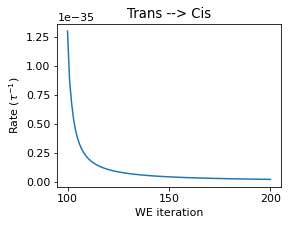

In [308]:
rateevol = np.array(f1['rate_evolution']['expected'][:,0,1])
plt.figure(figsize=(4,3))
plt.rcParams['font.size'] = '11'
plt.plot(rateevol)
plt.xlabel('WE iteration')
plt.ylabel(r'Rate ($\tau^{-1}$)')
plt.title( 'Trans --> Cis')
#plt.ylim([0,10e-5])
#plt.text(100, 6e-5,'MFPT: 5.3 microsec')
plt.xticks([0, 50, 100],['100','150','200'])
plt.savefig('rate_evol_trans-cis.png',dpi=300, bbox_inches='tight')

#### Obtaining MFPTs from rates
* The MFPT is calculated by dividing the rate by $\tau$ to get the value in sec$^{-1}$ for uni-molecular reactions. 
* For bi-molecular reactions divide by concentration also

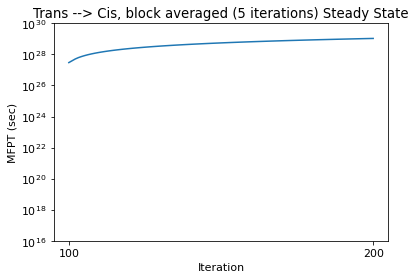

In [310]:
rateevol = np.array(rateevol)
block = 5
mfpt = np.empty(rateevol.size-block)
for i in range(rateevol.size-block):
    mfpt[i] = (np.mean(rateevol[i:i+5])/(25*10e-12))**-1
plt.semilogy(np.arange(96),mfpt)
plt.ylim([10e15, 10e29])
plt.xlabel('Iteration')
plt.ylabel('MFPT (sec)')
plt.title('Trans --> Cis, block averaged (5 iterations) Steady State')
#plt.xticks(range(96),[str(i) for i in np.arange(105,201)])
plt.xticks([0,95],['100','200'])
plt.savefig('mfpt_trans-cis.png',dpi=300, bbox_inches='tight')

### Cis to Trans transition rate (SS, 100th iteration)

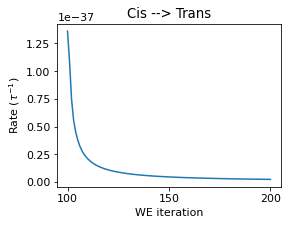

In [309]:
rateevol = np.array(f1['rate_evolution']['expected'][:,1,0])
plt.figure(figsize=(4,3))
plt.rcParams['font.size'] = '11'
plt.plot(rateevol)
plt.xlabel('WE iteration')
plt.ylabel(r'Rate ($\tau^{-1}$)')
plt.title( 'Cis --> Trans')
#plt.ylim([0,10e-38])
#plt.text(100, 6e-5,'MFPT: 3.2 microsec')
plt.xticks([0, 50, 100],['100','150','200'])
plt.savefig('rate_evol_cis-trans.png',dpi=300, bbox_inches='tight')

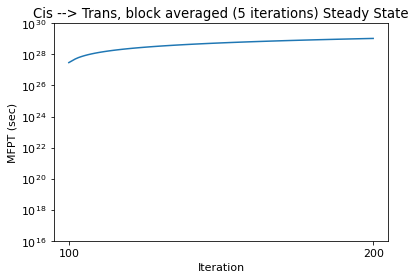

In [311]:
rateevol = np.array(rateevol)
block = 5
mfpt = np.empty(rateevol.size-block)
for i in range(rateevol.size-block):
    mfpt[i] = (np.mean(rateevol[i:i+5])/(25*10e-12))**-1
plt.semilogy(np.arange(96),mfpt)
plt.ylim([10e15, 10e29])
plt.xlabel('Iteration')
plt.ylabel('MFPT (sec)')
plt.title('Cis --> Trans, block averaged (5 iterations) Steady State')
#plt.xticks(range(96),[str(i) for i in np.arange(105,201)])
plt.xticks([0,95],['100','200'])
plt.savefig('mfpt_cis-trans.png',dpi=300, bbox_inches='tight')

### Plot of target flux evolution

Text(0.5, 1.0, 'State 0')

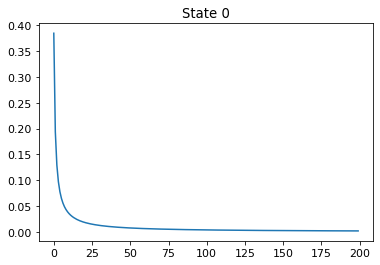

In [312]:
plt.plot(f2['target_flux_evolution']['expected'][:,0])
plt.title('State 0')

## Conditional flux evolution

In [281]:
trans_cis = np.array(f1['conditional_flux_evolution']['expected'][:,0,1])
cis_trans = np.array(f1['conditional_flux_evolution']['expected'][:,1,0])

### Conditional fluxes
* cond_flux1: From SS portion (iter 100)
* cond_flux2: From iter 0
* They should match

Text(0.5, 1.0, 'From state 1 to 0')

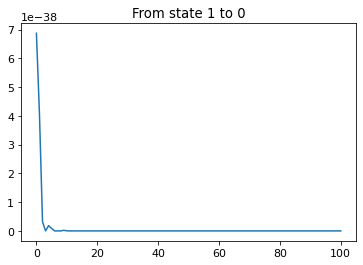

In [313]:
cond_flux1 = np.array([f1['conditional_fluxes'][i,1,0]for i in range(101)])
plt.plot(cond_flux1)
plt.title('From state 1 to 0')

Text(0.5, 1.0, 'From state 0 to 1')

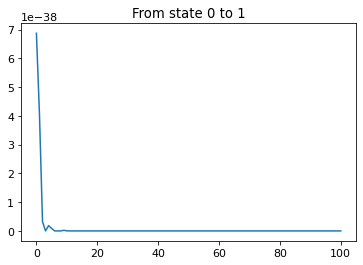

In [314]:
cond_flux2 = np.array([f2['conditional_fluxes'][i,1,0]for i in range(99,200)])
plt.plot(cond_flux2)
plt.title('From state 0 to 1')

([<matplotlib.axis.XTick at 0x2b02f4541490>,
 [Text(0, 0, '100'), Text(95, 0, '200')])

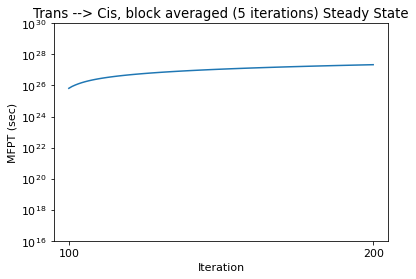

In [283]:
block = 5
mfpt = np.empty(trans_cis.size-block)
for i in range(trans_cis.size-block):
    mfpt[i] = (np.mean(trans_cis[i:i+5])/(25*10e-12))**-1
plt.semilogy(np.arange(96),mfpt)
plt.ylim([10e15, 10e29])
plt.xlabel('Iteration')
plt.ylabel('MFPT (sec)')
plt.title('Trans --> Cis, block averaged (5 iterations) Steady State')
#plt.xticks(range(96),[str(i) for i in np.arange(105,201)])
plt.xticks([0,95],['100','200'])

([<matplotlib.axis.XTick at 0x2b02f4993d10>,
 [Text(0, 0, '100'), Text(95, 0, '200')])

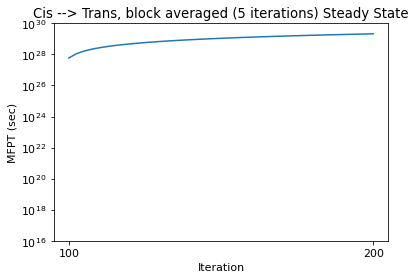

In [284]:
block = 5
mfpt = np.empty(cis_trans.size-block)
for i in range(cis_trans.size-block):
    mfpt[i] = (np.mean(cis_trans[i:i+5])/(25*10e-12))**-1
plt.semilogy(np.arange(96),mfpt)
plt.ylim([10e15, 10e29])
plt.xlabel('Iteration')
plt.ylabel('MFPT (sec)')
plt.title('Cis --> Trans, block averaged (5 iterations) Steady State')
#plt.xticks(range(96),[str(i) for i in np.arange(105,201)])
plt.xticks([0,95],['100','200'])

# Using westpa python api 

In [24]:
from westpa.analysis import Run
import matplotlib.pyplot as plt
from westpa.analysis import BasicMDTrajectory

In [10]:
run = Run.open('west.h5')

In [11]:
run.summary

,n_particles,min_bin_prob,max_bin_prob,min_seg_prob,max_seg_prob,cputime,walltime
1,8386,8.326395e-04,0.001665,8.326395e-05,0.000333,145015.549636,8672.744122
2,1890,8.326395e-05,0.032639,1.189485e-05,0.005162,34204.351420,1972.808384
3,1778,1.189485e-05,0.051417,1.699264e-06,0.010075,30905.680454,1841.225153
4,1827,1.699264e-06,0.040878,2.427520e-07,0.008604,32525.193868,1896.293755
5,1848,2.427520e-07,0.046131,3.467886e-08,0.009240,33419.922834,1935.247773
...,...,...,...,...,...,...,...
196,1855,1.494956e-120,0.046695,2.135651e-121,0.010480,30518.865729,1949.059096
197,1855,3.890084e-121,0.061241,4.862605e-122,0.011348,31165.629947,1912.728772
198,1904,4.862605e-122,0.050684,6.078256e-123,0.010750,32405.725246,1963.881185
199,1841,1.260056e-122,0.041755,1.575070e-123,0.008684,31072.612690,1897.185952


Text(0.5, 1.0, 'Minimum bin probability')

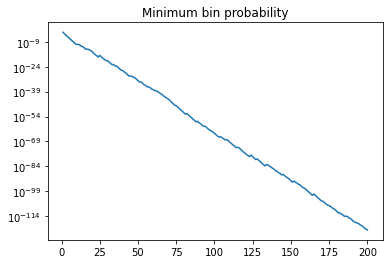

In [17]:
plt.semilogy(run.summary['min_bin_prob'])
plt.title('Minimum bin probability')

Text(0.5, 1.0, 'walltime')

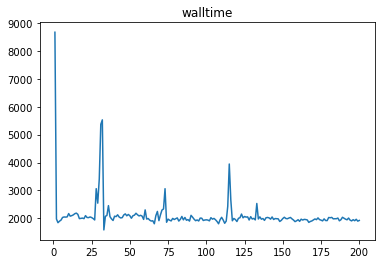

In [22]:
plt.plot(run.summary['walltime'])
plt.title(run.summary.columns[-1])

In [ ]:
for iteration in run:
    print(iteration)

In [79]:
iteration = run.iteration(195)
walker = iteration.walker(4)

In [80]:
walker.segment_summary

weight                 0.0
parent_id               45
wtg_n_parents            1
wtg_offset               4
cputime          19.822959
walltime         38.941973
endpoint_type       MERGED
status            COMPLETE
Name: 4, dtype: object

In [81]:
for child in walker.children:
    print(child)